In [43]:
import pandas as pd
import numpy as np

import datetime
from datetime import datetime

In [44]:
# Import data
df8 = pd.read_excel('Data_Absen 08-2022.xlsx')
df9 = pd.read_excel('Data_Absen 09-2022.xlsx')
df10 = pd.read_excel('Data_Absen 10-2022.xlsx')
df11 = pd.read_excel('Data_Absen 11-2022.xlsx')
df12 = pd.read_excel('Data_Absen 12-2022.xlsx')

df1 = pd.read_excel('Data_Absen 01-2023.xlsx')
df2 = pd.read_excel('Data_Absen 02-2023.xlsx')

Pembuatan fungsi untuk preprocessing data

In [45]:
# Pembuatan Function

# Func capitalize columns
def Capt(data):
  data.columns = data.columns.str.lower()
  data.columns = data.columns.str.capitalize()
  return data

# Func change name columns
def Changename(data):
  data.rename(columns={'Jam_keluar': 'Jam_pulang'}, inplace=True)
  return data

# Func change value columns
def Changevalue(data, kolom):
  data[kolom] = data[kolom].apply(str.lower)
  data[kolom] = data[kolom].apply(str.capitalize)
  return data

# Func preprocessing keterangan columns
def PreparationColumns(data):
  data.loc[data['Keterangan'] == 'Libur setting tpp', 'Keterangan'] = 'Libur'
  data.loc[data['Keterangan'] == 'Libur hari kemerdekaan ri', 'Keterangan'] = 'Libur'

  # Potongan kehadiran di anggap hadir karena pegawai tersebut hadir namun telat
  data.loc[data['Keterangan'] == 'Potongan kehadiran 2.5%', 'Keterangan'] = 'Hadir'
  data.loc[data['Keterangan'] == 'Potongan kehadiran 2%', 'Keterangan'] = 'Hadir'
  data.loc[data['Keterangan'] == 'Potong kehadiran 2%', 'Keterangan'] = 'Hadir'
  data.loc[data['Keterangan'] == 'Potongan kehadiran 3%', 'Keterangan'] = 'Hadir'
  data.loc[data['Keterangan'] == 'Potongan kehadiran 5%', 'Keterangan'] = 'Hadir'
  data.loc[data['Keterangan'] == 'Potongan kehadiran 6%', 'Keterangan'] = 'Hadir'
  data.loc[data['Keterangan'].str.contains('Surat tugas'), 'Keterangan'] = 'Hadir'

  data.loc[data['Keterangan'] == 'Tidak hadir potongan 7%', 'Keterangan'] = 'Tidak Hadir'
  data.loc[data['Keterangan'] == 'Sakit', 'Keterangan'] = 'Tidak Hadir'
  data.loc[data['Keterangan'] == 'Cuti', 'Keterangan'] = 'Tidak Hadir'
  data.loc[data['Keterangan'] == 'Ijin', 'Keterangan'] = 'Tidak Hadir'
  return data

# Menghapus hari libur
def removeWeekends(data):
  data = data[data['Keterangan'] != 'Libur']
  data = data[data['Hari'] != 'Sabtu']
  data = data[data['Hari'] != 'Minggu']
  return data

In [46]:
# Masuk bab IV
# Data sebelum dilakukan cleansing
# frames = [df8, df9, df10, df11, df12, df1, df2]
# data = pd.concat(frames)
# data['Keterangan'].value_counts()

Mengaplikasikan fungsi yang dibuat

In [47]:
# Apply func
# Bulan 8
df8 = Capt(df8)
df8 = Changename(df8)
df8 = Changevalue(df8, 'Keterangan')
df8 = Changevalue(df8, 'Nama')
df8 = Changevalue(df8, 'Hari')

# Bulan 9 2022
df9 = Capt(df9)
df9 = Changename(df9)
df9 = Changevalue(df9, 'Keterangan')
df9 = Changevalue(df9, 'Nama')
df9 = Changevalue(df9, 'Hari')

# Bulan 10 2022
df10 = Capt(df10)
df10 = Changename(df10)
df10 = Changevalue(df10, 'Keterangan')
df10 = Changevalue(df10, 'Nama')
df10 = Changevalue(df10, 'Hari')

# Bulan 11 2022
df11 = Capt(df11)
df11 = Changename(df11)
df11 = Changevalue(df11, 'Keterangan')
df11 = Changevalue(df11, 'Nama')
df11 = Changevalue(df11, 'Hari')

# Bulan 12 2022
df12 = Capt(df12)
df12 = Changename(df12)
df12 = Changevalue(df12, 'Keterangan')
df12 = Changevalue(df12, 'Nama')
df12 = Changevalue(df12, 'Hari')

# Bulan 1 2023
df1 = Capt(df1)
df1 = Changevalue(df1, 'Keterangan')
df1 = Changevalue(df1, 'Nama')
df1 = Changevalue(df1, 'Hari')

# Bulan 2 2023
df2 = Capt(df2)
df2 = Changevalue(df2, 'Keterangan')
df2 = Changevalue(df2, 'Nama')
df2 = Changevalue(df2, 'Hari')

Total keseluruhan dataset sebelum dibersihkan

In [48]:
df8.shape[0] + df9.shape[0] + df10.shape[0] + df11.shape[0] + df12.shape[0] + df1.shape[0] + df2.shape[0]

2756

Penggabungan dataset dari bulan agustus 2022 - Februari 2023

In [49]:
# Concat Dataframe
frames = [df8, df9, df10, df11, df12, df1, df2]
data = pd.concat(frames)
data = PreparationColumns(data)
data = removeWeekends(data)
print(data.shape)
data.head()

(1808, 8)


,Nama,Tanggal,Hari,Jam_masuk,Jam_pulang,Kelalaian_masuk,Kelalaian_pulang,Keterangan
0,Didik sutrisno,2022-08-01,Senin,07:18:00,16:02:00,0,0,Hadir
1,Didik sutrisno,2022-08-02,Selasa,07:24:00,16:00:00,0,0,Hadir
2,Didik sutrisno,2022-08-03,Rabu,07:29:00,16:00:00,0,0,Hadir
3,Didik sutrisno,2022-08-04,Kamis,07:28:00,16:02:00,0,0,Hadir
4,Didik sutrisno,2022-08-05,Jumat,07:35:00,11:04:00,5,0,Hadir


<H1>VISUALISASI DATA

In [50]:
data.Keterangan.value_counts()

# Export ke excel
# data.to_excel('DataAfterPreparation.xlsx', index=False)

Hadir          1705
Tidak Hadir     103
Name: Keterangan, dtype: int64

VISUALISASI DATA SAKIT

In [51]:
# Concat Dataframe
frames = [df8, df9, df10, df11, df12, df1, df2]
data_vis = pd.concat(frames)
data_vis = removeWeekends(data_vis)

(1963, 8)


Pengambilan data sakit berdasarkan bulan

In [52]:
data_vis['bulan'] = data_vis['Tanggal'].dt.month
data_vis['month_year'] = data_vis['Tanggal'].dt.strftime('%m-%Y')

In [53]:
data_sakit = data_vis[data_vis['Keterangan']=='Sakit']

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

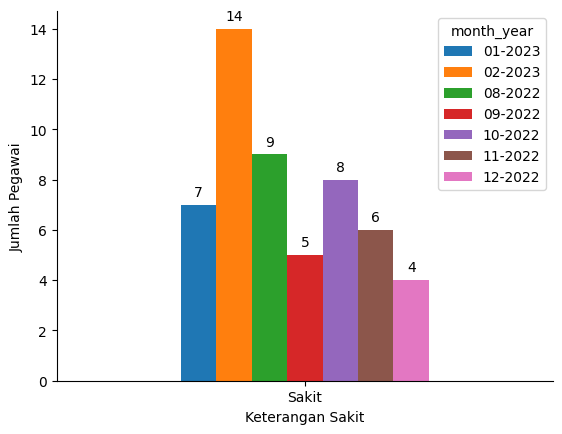

In [55]:
splot = data_sakit.groupby(['Keterangan'])['month_year'].value_counts().sort_index().unstack().plot.bar()
sns.despine(top=True, right=True)
plt.tick_params(labelrotation=0)
plt.ylabel('Jumlah Pegawai')
plt.xlabel('Keterangan Sakit')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()

VISUALISASI DATA JUMLAH KELALAIAN PEGAWAI BERDASARKAN BULAN

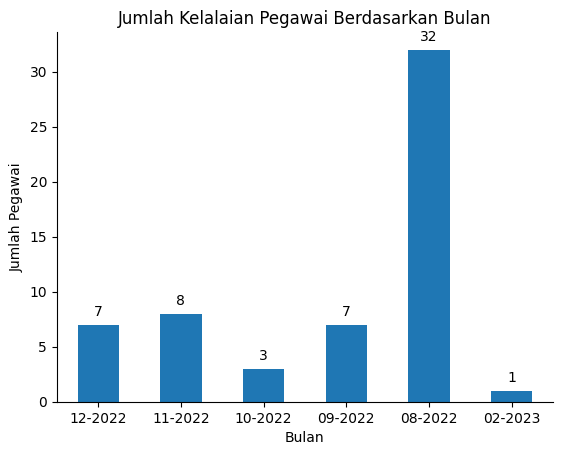

In [56]:
splot = data_vis[data_vis['Keterangan'].str.contains('Potongan kehadiran')==True]['month_year'].value_counts().sort_index(ascending=False).plot.bar()
sns.despine(top=True, right=True)
plt.tick_params(labelrotation=0)
plt.title('Jumlah Kelalaian Pegawai Berdasarkan Bulan')
plt.ylabel('Jumlah Pegawai')
plt.xlabel('Bulan')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()